In [1]:
import os
import matplotlib.pyplot as plt
import numpy as np
import sys
sys.path.append('/pscratch/sd/d/davidsan/HSC-PDR1-3x2pt-harmonic-methods/scripts/')
import HSCMeasurementUtils
import sacc

## Photometric redshift distribution

In [2]:
fname = '/pscratch/sd/d/davidsan/HSC-PDR1-3x2pt-harmonic-methods/data/harmonic/txpipe/combined/summary_statistics_fourier_ivw.sacc'
s = sacc.Sacc.load_fits(fname)

In [3]:
savepath = '/pscratch/sd/d/davidsan/HSC-PDR1-3x2pt-harmonic-methods/figures/redshift-distribution'

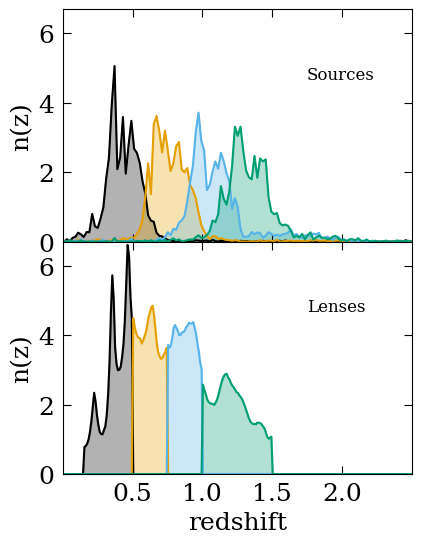

()

In [4]:
HSCMeasurementUtils.RedshiftDistr_plot(sacc = s,
                                       savepath = savepath)

## Angular power spectra

### Cosmic shear

>>  Cosmic shear - Hikage et al.
>>  Cosmic shear - Nicola et al.


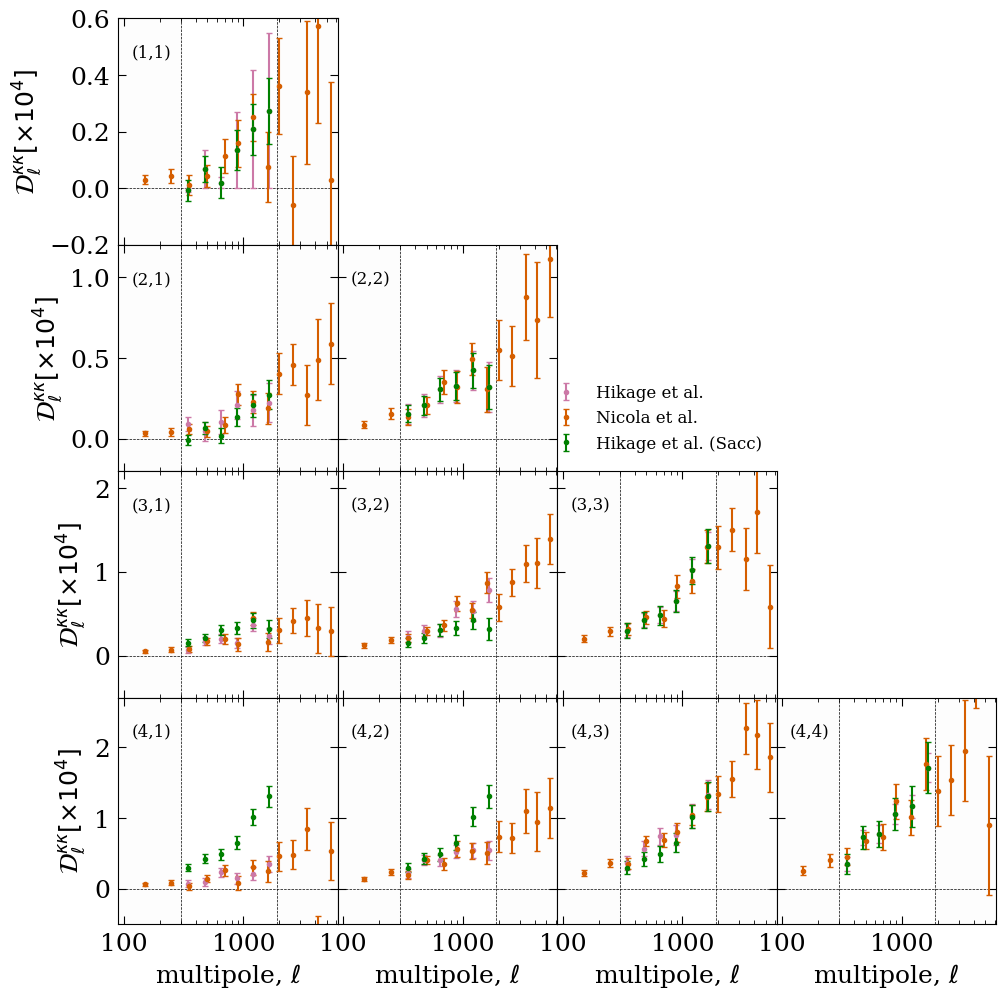

()

In [2]:
HSCMeasurementUtils.Shear2pt_plot(fname = [None],
                                  labels = [None],
                                  add_individual = False,
                                  add_combined = False,
                                  add_literature=True,
                                  add_Hikage_sacc=True,
                                  theory_fname=None,
                                  just_auto = False,
                                  save_fig=False)

>>  Cosmic shear - Hikage et al.
>>  Cosmic shear - Nicola et al.


>> Saving figure ...
Shear2pt_Literature_CombinedIVW


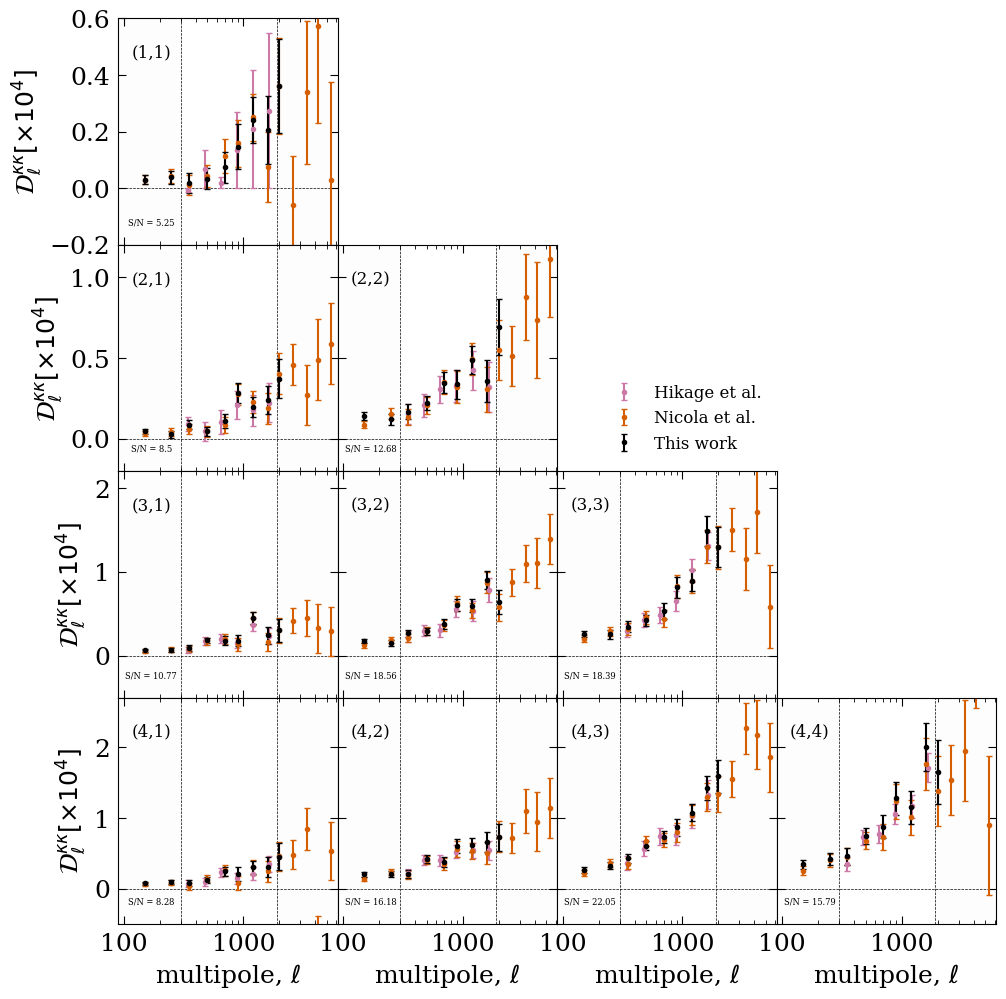

()

In [3]:
HSCMeasurementUtils.Shear2pt_plot(fname = [None],
                                  labels = [None],
                                  add_individual = False,
                                  add_combined = 'ivw',
                                  add_literature=True,
                                  add_Hikage_sacc=False,
                                  theory_fname=None,
                                  just_auto = False,
                                  save_fig=True)

### Galaxy clustering

>>  Galaxy clustering - Nicola et al.
>>  Galaxy clustering - Nicola et al.
>>  Galaxy clustering - Nicola et al.
>>  Galaxy clustering - Nicola et al.


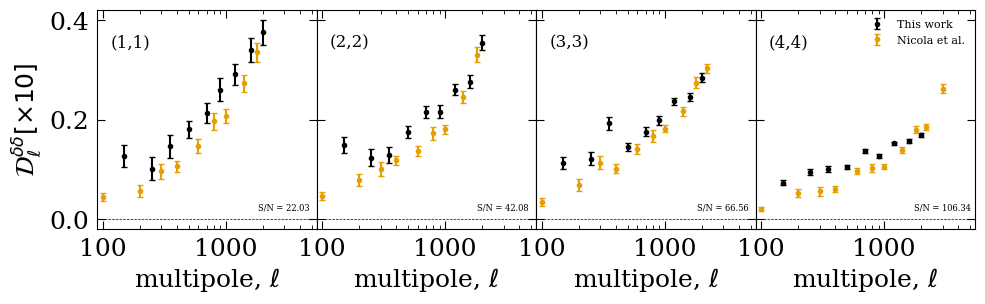

()

In [3]:
HSCMeasurementUtils.Clustering2pt_plot(fname = [None],
                                       labels = [None],
                                       add_individual=False,
                                       add_combined='ivw',
                                       add_literature=True,
                                       save_fig=True)

In [2]:
fname = ['/pscratch/sd/d/davidsan/txpipe-reanalysis/hsc/outputs/outputs_gama09h/summary_statistics_fourier.sacc',
         '/pscratch/sd/d/davidsan/txpipe-reanalysis/hsc/outputs/outputs_gama15h/summary_statistics_fourier.sacc',
         '/pscratch/sd/d/davidsan/txpipe-reanalysis/hsc/outputs/outputs_vvds/summary_statistics_fourier.sacc',
         '/pscratch/sd/d/davidsan/txpipe-reanalysis/hsc/outputs/outputs_wide12h/summary_statistics_fourier.sacc',
         '/pscratch/sd/d/davidsan/txpipe-reanalysis/hsc/outputs/outputs_xmm/summary_statistics_fourier.sacc']
labels = ['GAMA09H',
          'GAMA15H',
          'VVDS',
          'WIDE12H',
          'XMM']

In [ ]:
HSCMeasurementUtils.Gammat2pt_plot(fname = fname,
                                   labels = labels,
                                   add_individual = True,
                                   add_combined = 'ivw',
                                   theory_fname = None,
                                   save_fig=True)